In [1]:
source('source.r')

Packages Loaded:
ncdf4 R.matlab openxlsx RColorBrewer compiler lattice geosphere readxl data.table rworldmap rworldxtra


Loading required package: ncdf4
Loading required package: R.matlab
R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen

Loading required package: openxlsx
Loading required package: RColorBrewer
Loading required package: compiler
Loading required package: lattice
Loading required package: geosphere
Loading required package: readxl
Loading required package: data.table
Loading required package: rworldmap
Loading required package: sp
Error: package or namespace load failed for ‘rworldmap’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘fields’
Loading required package: rworldxtra


# Vertical Analysis Module

In [2]:
load('RStates/ship.final.2min.rdata')
load('RStates/CTD.all.rdata')

In [3]:
load.profiles = function() {
    p1 = read.xlsx('Input Data/MIMS Vertical Profile Cycle 2.xlsx')
    p2 = read.xlsx('Input Data/MIMS Vertical Profile Cycle 3.xlsx')
    p3 = read.xlsx('Input Data/MIMS Vertical Profile Cycle 4.xlsx')
    
    p1$Time = conv_excel_time(p1$Time)
    p2$Time = conv_excel_time(p2$Time)
    p3$Time = conv_excel_time(p3$Time)
    
    list(p1 = p1, p2 = p2, p3 = p3)
}


profiles = load.profiles()

In [4]:
interp.simple = function(depth, depth.new, var) {
    var.new = rep(0, length(depth.new))
    
    for (i in 1:length(depth.new)) {
        dt = depth - depth.new[i]
        l.before = which(dt < 0)
        l.after = which(dt > 0)
        
        if (length(l.before) < 1) {
            var.new[i] = var[which.min(dt)]
        }
        
        else if (length(l.after) < 1) {
            var.new[i] = var[which.max(dt)]
        }
        
        else {
            var.before = var[l.before[which.max(dt[l.before])]]
            var.after = var[l.after[which.min(dt[l.after])]]
            
            dt.before = dt[l.before[which.max(dt[l.before])]]
            dt.after = dt[l.after[which.min(dt[l.after])]]
            
            var.new[i] = var.before - (var.after - var.before) / (dt.after - dt.before) * dt.before
        }
    }
    ## Return
    var.new
}

interp.simple.time = function(time, time.new, var) {
    var.new = rep(0, length(time.new))
    
    for (i in 1:length(time.new)) {
        dt = as.numeric(difftime(time, time.new[i], units = 'hours'))
        l.before = which(dt < 0)
        l.after = which(dt > 0)
        
        if (length(l.before) < 1) {
            var.new[i] = var[which.min(dt)]
        }
        
        else if (length(l.after) < 1) {
            var.new[i] = var[which.max(dt)]
        }
        
        else {
            var.before = var[l.before[which.max(dt[l.before])]]
            var.after = var[l.after[which.min(dt[l.after])]]
            
            dt.before = dt[l.before[which.max(dt[l.before])]]
            dt.after = dt[l.after[which.min(dt[l.after])]]
            
            var.new[i] = var.before - (var.after - var.before) / (dt.after - dt.before) * dt.before
        }
    }
    ## Return
    var.new
}

In [5]:
l = which(ctd$Cast == 22)
profiles$p1$T = interp.simple(ctd$Depth[l], -profiles$p1$Depth, ctd$T090C[l])
profiles$p1$S = interp.simple(ctd$Depth[l], -profiles$p1$Depth, ctd$Sal00[l])
profiles$p1$O2 = interp.simple(ctd$Depth[l], -profiles$p1$Depth, ctd$O2[l])
profiles$p1$FL = interp.simple(ctd$Depth[l], -profiles$p1$Depth, ctd$Fluor[l])

l = which(ctd$Cast == 32)
profiles$p2$T = interp.simple(ctd$Depth[l], -profiles$p2$Depth, ctd$T090C[l])
profiles$p2$S = interp.simple(ctd$Depth[l], -profiles$p2$Depth, ctd$Sal00[l])
profiles$p2$O2 = interp.simple(ctd$Depth[l], -profiles$p2$Depth, ctd$O2[l])
profiles$p2$FL = interp.simple(ctd$Depth[l], -profiles$p2$Depth, ctd$Fluor[l])

l = which(ctd$Cast == 74)
profiles$p3$T = interp.simple(ctd$Depth[l], -profiles$p3$Depth, ctd$T090C[l])
profiles$p3$S = interp.simple(ctd$Depth[l], -profiles$p3$Depth, ctd$Sal00[l])
profiles$p3$O2 = interp.simple(ctd$Depth[l], -profiles$p3$Depth, ctd$O2[l])
profiles$p3$FL = interp.simple(ctd$Depth[l], -profiles$p3$Depth, ctd$Fluor[l])

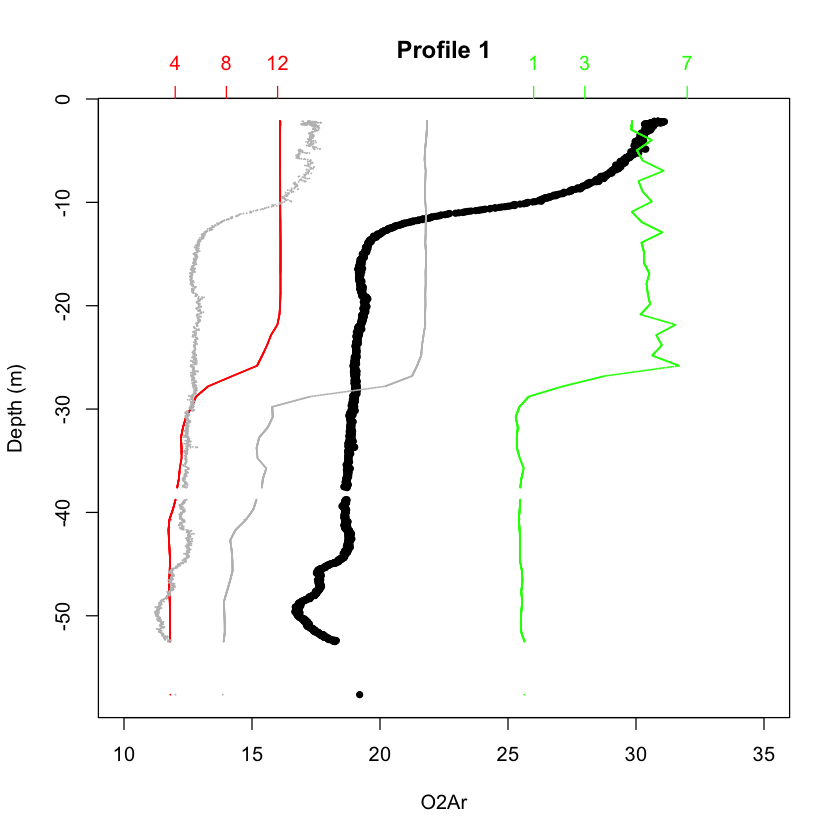

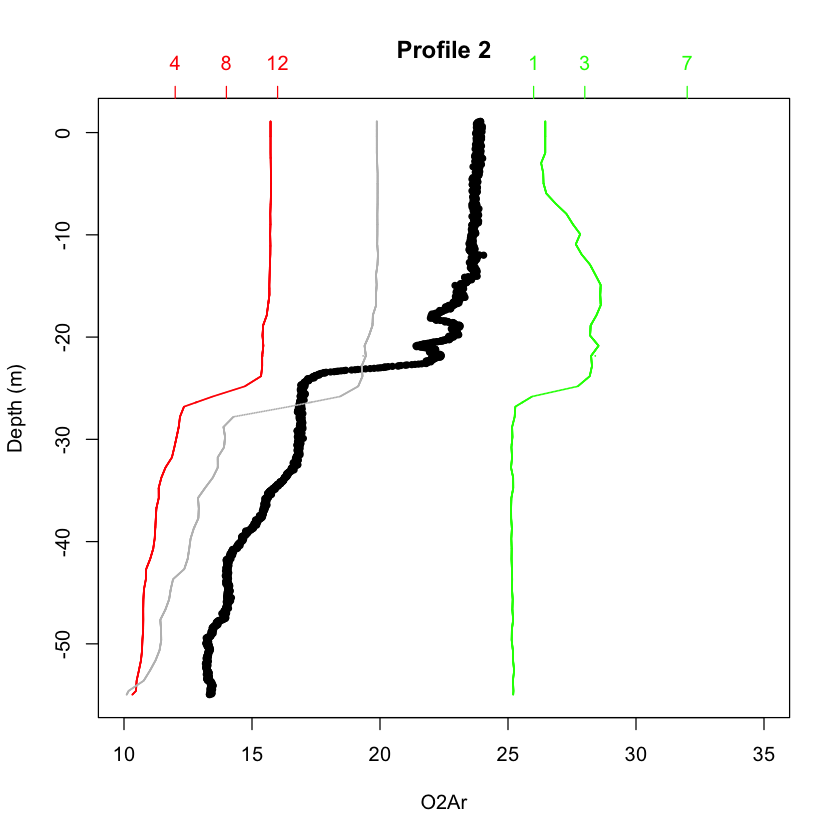

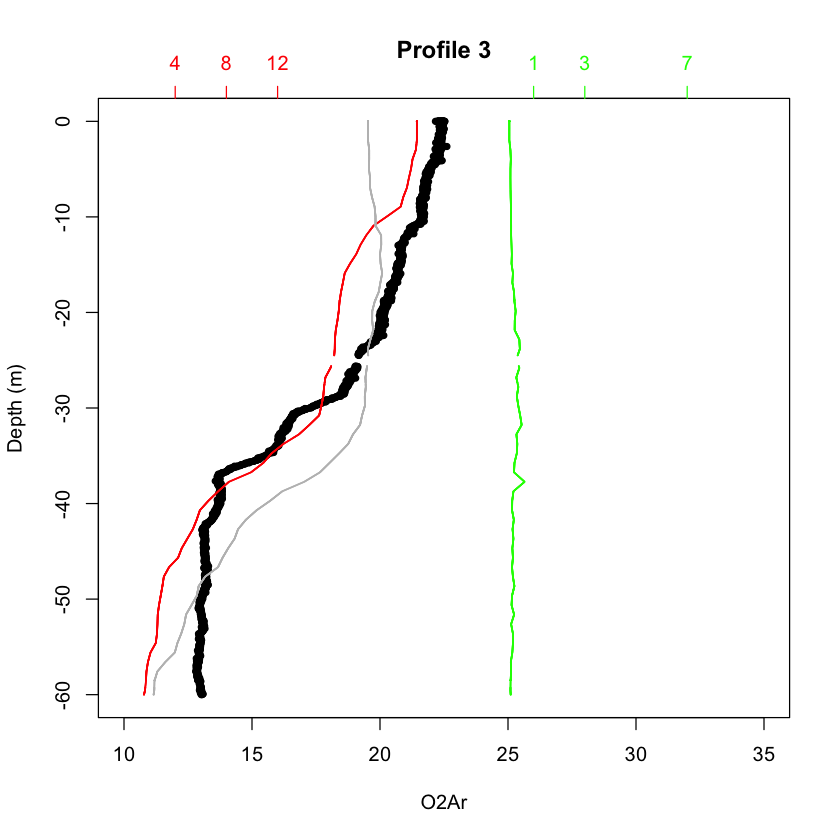

In [7]:
#### Profile 1
plot(profiles$p1$O2Ar, profiles$p1$Depth, pch=20, xlim=c(10,35), ylab='Depth (m)', xlab='O2Ar', main='Profile 1')
points(profiles$p1$T*2-10, profiles$p1$Depth, pch=16, col='red', cex=0.2)
points(profiles$p1$FL+25, profiles$p1$Depth, col='green', pch=16, cex=0.2)
points(profiles$p1$X32*2e8, profiles$p1$Depth, col='grey', pch=16, cex=0.2)
points(profiles$p1$O2/10, profiles$p1$Depth, col='grey', pch=16, cex=0.2)
#points(profiles$p1$X32, profiles$p1$Depth, col='grey', pch=16, cex=0.2)

axis(3, at = c(12, 14, 16), labels = c(4, 8, 12), col.axis='red', col.ticks = 'red')
axis(3, at = c(26, 28, 32), labels = c(1, 3, 7), col.axis='green', col.ticks = 'green')

#### Profile 2
plot(profiles$p2$O2Ar, profiles$p2$Depth, pch=20, xlim=c(10,35), ylab='Depth (m)', xlab='O2Ar', main='Profile 2')
points(profiles$p2$T*2-10, profiles$p2$Depth, pch=16, col='red', cex=0.2)
points(profiles$p2$FL+25, profiles$p2$Depth, col='green', pch=16, cex=0.2)
points(profiles$p2$O2/10, profiles$p2$Depth, col='grey', pch=16, cex=0.2)

axis(3, at = c(12, 14, 16), labels = c(4, 8, 12), col.axis='red', col.ticks = 'red')
axis(3, at = c(26, 28, 32), labels = c(1, 3, 7), col.axis='green', col.ticks = 'green')

#### Profile 3
plot(profiles$p3$O2Ar, profiles$p3$Depth, pch=20, xlim=c(10,35), ylab='Depth (m)', xlab='O2Ar', main='Profile 3')
points(profiles$p3$T*2-10, profiles$p3$Depth, pch=16, col='red', cex=0.2)
points(profiles$p3$FL+25, profiles$p3$Depth, col='green', pch=16, cex=0.2)
points(profiles$p3$O2/10, profiles$p3$Depth, col='grey', pch=16, cex=0.2)

axis(3, at = c(12, 14, 16), labels = c(4, 8, 12), col.axis='red', col.ticks = 'red')
axis(3, at = c(26, 28, 32), labels = c(1, 3, 7), col.axis='green', col.ticks = 'green')

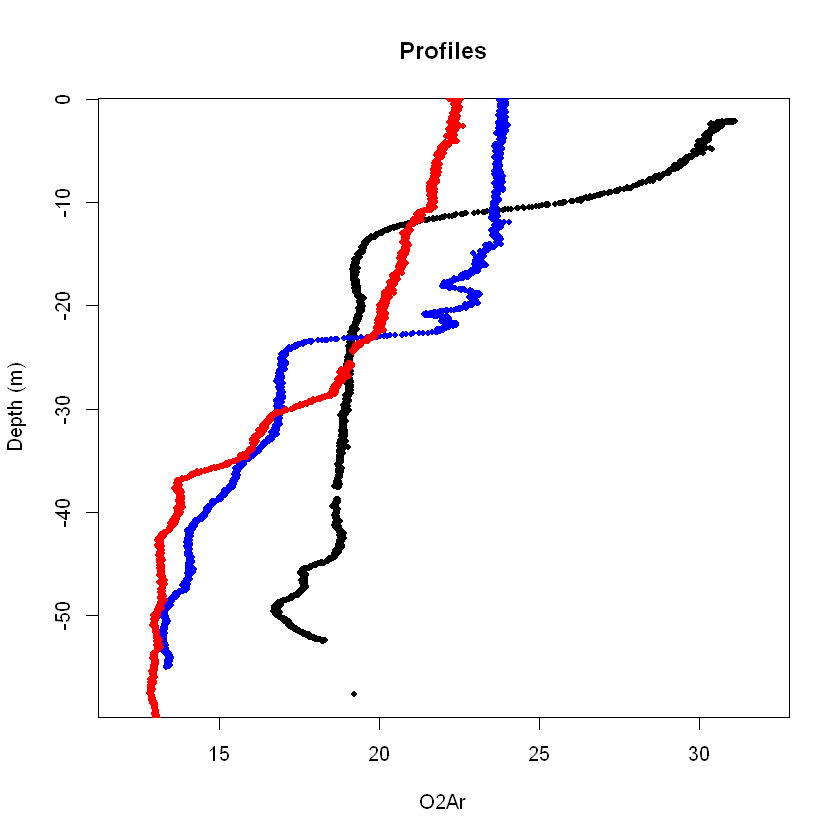

In [69]:
plot(profiles$p1$O2Ar, profiles$p1$Depth, pch=20, xlim=c(12,32), ylab='Depth (m)', xlab='O2Ar', main='Profiles')
points(profiles$p2$O2Ar, profiles$p2$Depth, pch=20, col='blue')
points(profiles$p3$O2Ar, profiles$p3$Depth, pch=20, col='red')

In [45]:
winch = read.xlsx('Raw Data/Profiles/winch-depth profiles.xlsx', sheet='All')
winch$DateTime = conv_excel_time(winch$DateTime, tz = 'UTC')
str(winch)

'data.frame':	102 obs. of  5 variables:
 $ Date    : num  42901 42901 42901 42901 42901 ...
 $ Time    : num  0.826 0.867 0.868 0.869 0.871 ...
 $ DateTime: POSIXct, format: "2017-06-15 15:50:00" "2017-06-15 16:48:59" ...
 $ Cycle   : chr  "T3" "T3" "T3" "T3" ...
 $ Depth   : num  0 0 55 52.6 50.5 48.5 46.7 44.8 42.5 40.7 ...


In [6]:
add.profiles = function(ship.data) {
    ship.data$Vertical = 0
    ship.data$Vertical.Depth = 0

    for (i in 1:nrow(ship.data)) {
        dt = as.numeric(difftime(ship.data$DT[i], winch$DateTime, units = 'mins'))
        if (any(dt < 0) & any(dt > 0)) {
            l1 = which.min(-dt[dt<0])
            l2 = which.min(dt[dt > 0])
            ll = which.min(dt^2)
            if (dt[ll] ^ 2 < 100) {
                ship.data$Vertical[i] = winch$Cycle[ll]
            } else {
                ship.data$Vertical[i] = 0
            }
            
            
            m = (winch$Depth[dt > 0][l2] - winch$Depth[dt < 0][l1]) / (-dt[dt < 0][l1] + dt[dt > 0][l2])
            ship.data$Vertical.Depth[i] = m * -dt[dt < 0][l1] + winch$Depth[dt < 0][l1]
        } 
        else {
            ship.data$Vertical.Depth[i] = 0
        }
    }
    ship.data
}

In [7]:
ship.data = add.profiles(ship.data)

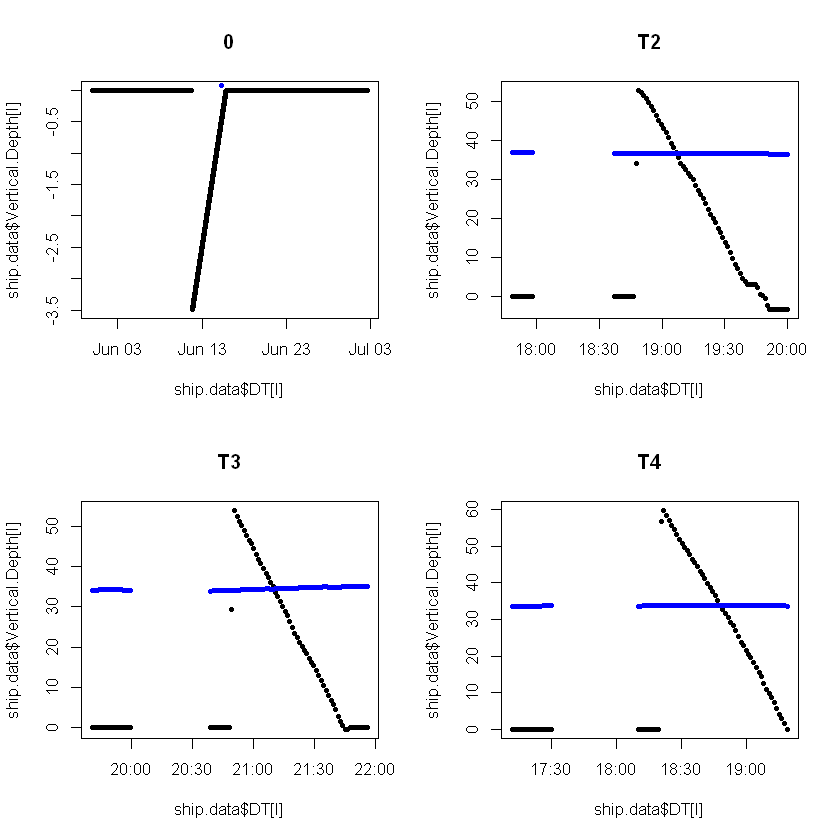

In [30]:
par(mfrow=c(2,2))
for (i in unique(ship.data$Vertical)) {
    l = which(ship.data$Vertical == i)
    plot(ship.data$DT[l], ship.data$Vertical.Depth[l], pch=20, cex=1, main=i)
    points(ship.data$DT[l], ship.data$EIMS.O2[l]/10, col='blue', pch=20)
}


In [11]:
plot.profile = function(name) {
    l = which(ship.data$Vertical == name)
    
    plot(ship.data$MIMS.O2.Ar[l], ship.data$Vertical.Depth[l], pch=20, main=name, ylab='Depth',
         xlab='MIMS O2/Ar', ylim=c(60,0), xaxs='i', yaxs='i')
    plot(ship.data$Optode.ch2[l], ship.data$Vertical.Depth[l], pch=20, main=name, ylab='Depth',
         xlab='MIMS Optode (ch2)', ylim=c(60,0), xaxs='i', yaxs='i')
}

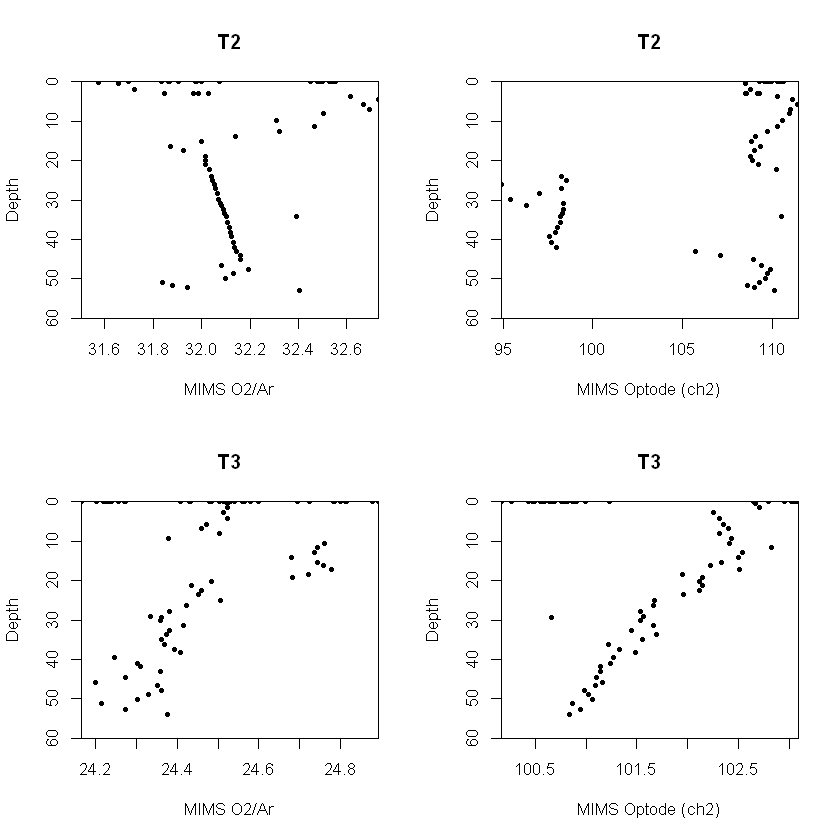

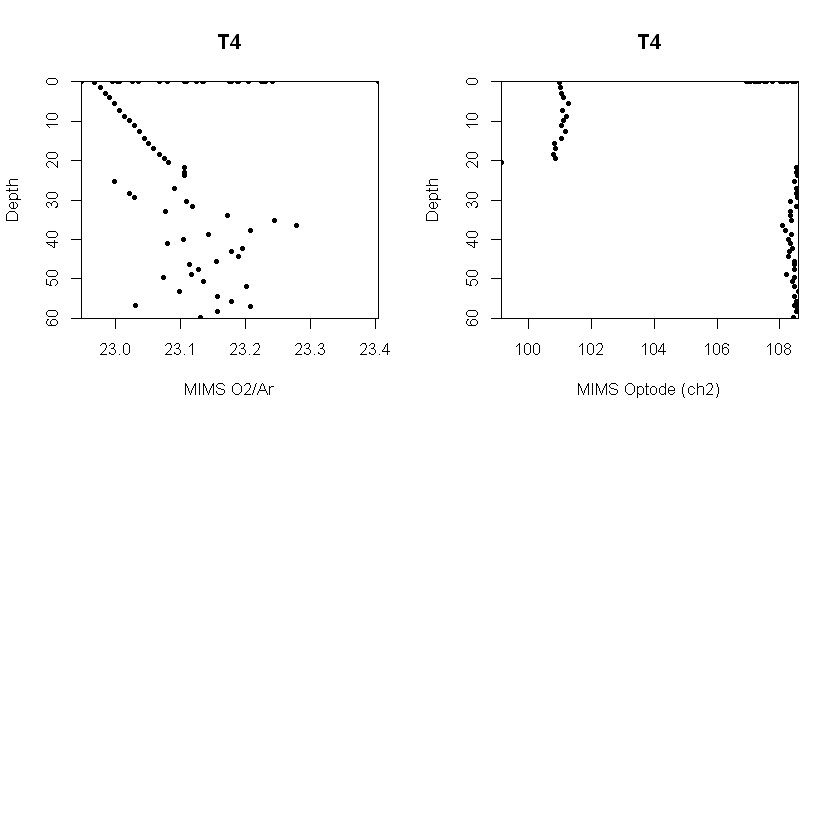

In [12]:
par(mfrow=c(2,2))
plot.profile('T2')
plot.profile('T3')
plot.profile('T4')
